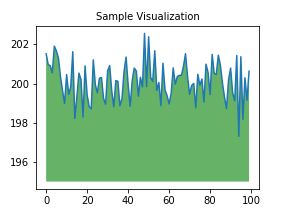

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [ ]:
import numpy as np # linear algebra operations
import pandas as pd # used for data preparation
import plotly.express as px #used for data visualization
from textblob import TextBlob #used for sentiment analysis
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/cleaned.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [ ]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(np.number)

In [ ]:
df_num = df.select_dtypes(np.number)

In [ ]:
df= df_num

In [ ]:
df=df_cat

In [ ]:
df.shape

(12316, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [ ]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
Weather_dummies = pd.get_dummies(df_cat['Weather_conditions'],drop_first=True,prefix='Weather')
df_cat = pd.concat([df_cat, Weather_dummies], axis=1)
df_cat.drop('Weather_conditions',axis=1, inplace=True)

In [ ]:
df_cat.dtypes

,0
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Lanes_or_Medians,object
Types_of_Junction,object
Road_surface_type,object
Light_conditions,object
Type_of_collision,object


In [ ]:
df_num.dtypes

,0
Accident_severity,int64


In [ ]:
df_ml=pd.concat([df_cat, df_num])

In [ ]:
df_ml.describe()

,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [ ]:
df_ml.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Pedestrian_movement',
       'Cause_of_accident', 'Weather_Fog or mist', 'Weather_Normal',
       'Weather_Other', 'Weather_Raining', 'Weather_Raining and Windy',
       'Weather_Snow', 'Weather_Unknown', 'Weather_Windy',
       'Accident_severity'],
      dtype='object')

In [ ]:
print(df['Driving_experience'].unique())
print(df['Accident_severity'].unique())

['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'Unknown' 'No Licence' 'Below 1yr'
 'unknown']
[2 1 0]


In [ ]:
print(df['Sex_of_driver'].unique())

['Male' 'Female' 'Unknown']


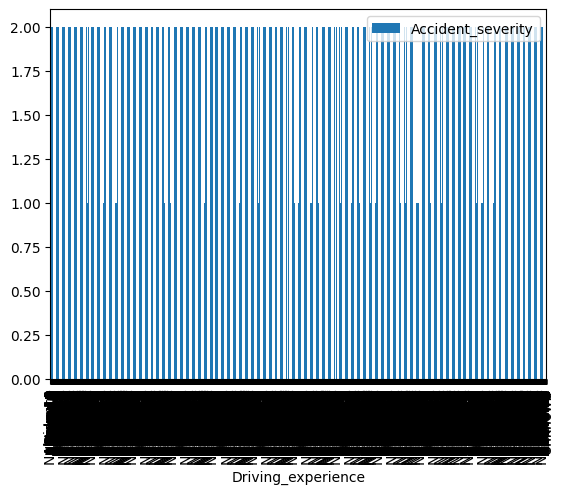

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/cleaned.csv')
df['Driving_experience'] = df['Driving_experience'].str.replace(',','').str.replace('yr','').str.split('-').str[0]
df['Accident_severity'] = pd.to_numeric(df['Accident_severity'].replace(',', ''))
df.plot(x='Driving_experience', y='Accident_severity', kind='bar')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px # import the plotly.express module

df = pd.read_csv('/content/drive/MyDrive/cleaned.csv')
df['Driving_experience'] = df['Driving_experience'].str.replace(',','').str.replace('yr','').str.split('-').str[0]
df['Accident_severity'] = pd.to_numeric(df['Accident_severity'].replace(',', ''))

pieChart = px.pie(df, values='Accident_severity', names='Driving_experience', title='Road accidents') # Pass df to the function
pieChart.show()

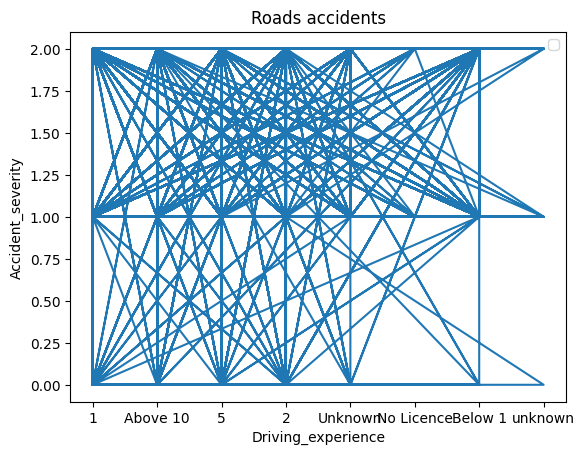

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Driving_experience'], df['Accident_severity'])
plt.xlabel('Driving_experience')
plt.ylabel('Accident_severity')
plt.title('Roads accidents')
plt.legend()
plt.show()


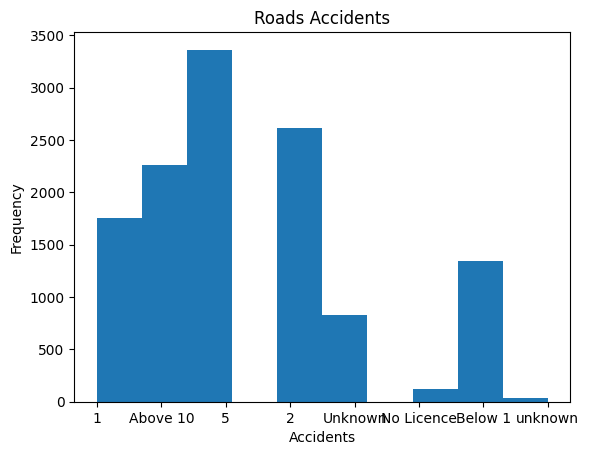

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Driving_experience'], bins=10)
plt.xlabel('Accidents')
plt.ylabel('Frequency')
plt.title('Roads Accidents')
plt.show()

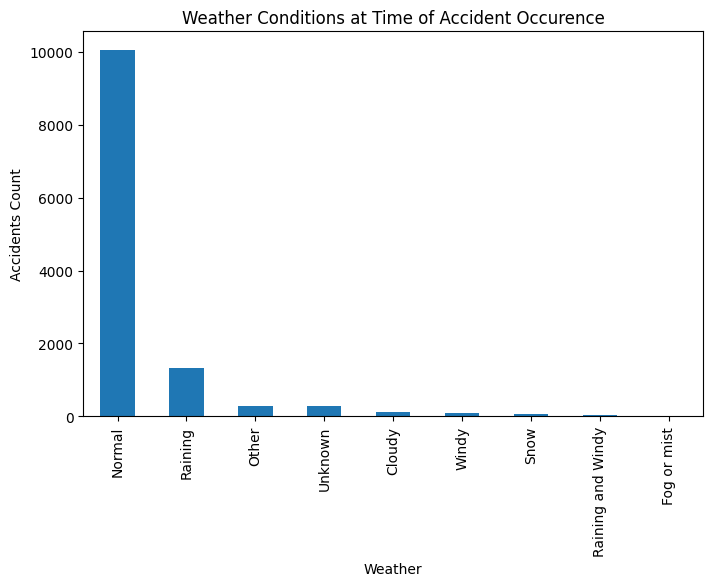

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
df['Weather_conditions']=df['Weather_conditions'].astype('category')
top_20_Weather =df['Weather_conditions'].value_counts().sort_values(ascending=False)[:20]
top_20_Weather.plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

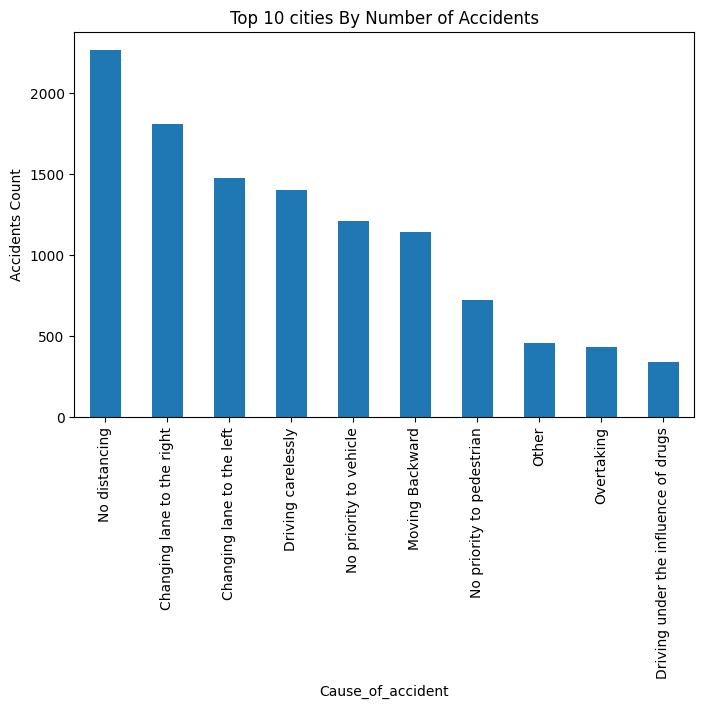

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
Cause_of_accident = df['Cause_of_accident'].value_counts()
Cause_of_accident[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cause_of_accident',
       ylabel = 'Accidents Count')
plt.show()